In [4]:
%matplotlib inline

In [5]:
pwd

u'/home/ubuntu/courses/deeplearning1/nbs'

In [6]:
path = "../../data/obj_neural_code/"
#path = "../../data/obj_neural_code/sample/"
modelpath = "../models/vgg16/"

In [7]:
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

In [8]:
import utils; reload(utils)
from utils import plots

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


In [9]:
import vgg16; reload(vgg16)
from vgg16 import Vgg16
vgg = Vgg16()

In [13]:
#vgg.model.summary()

In [ ]:
batch_size = 64
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size)

In [ ]:
vgg.finetune(batches)
vgg.fit(batches, val_batches, nb_epoch=10)

In [11]:
from keras.models import model_from_json
base = vgg.model
model_json = base.to_json()
with open(modelpath + "base.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
base.save_weights(modelpath+"base.h5")

In [12]:
from keras.models import Model
idx = [0,5,10,17,24,31,33,35,37]
layers  = []
for i in range(len(idx)):
    print(base.layers[idx[i]].name)
    layers.append( base.layers[idx[i]] )

models = []
for layer in layers:
    #print base_model.get_layer(layer.name)
    models.append( Model(input=base.input,
                         output=base.get_layer(layer.name).output) )

lambda_1
maxpooling2d_1
maxpooling2d_2
maxpooling2d_3
maxpooling2d_4
maxpooling2d_5
dense_1
dense_2
dense_3


In [31]:
for model in models:
    NAME = model.layers[-1].name    
    model_json = model.to_json()    
    with open(modelpath + NAME + '.json', 'w') as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights(modelpath + NAME + '.h5')
print("Saved models to disk")

lambda_1
maxpooling2d_1
maxpooling2d_2
maxpooling2d_3
maxpooling2d_4
maxpooling2d_5
dense_1
dense_2
dense_3
Saved models to disk


Found 1120 images belonging to 40 classes.
Found 160 images belonging to 40 classes.


Epoch 1/10
1120/1120 [==============================] - 34s - loss: 3.5660 - acc: 0.2339 - val_loss: 1.0369 - val_acc: 0.7438
Epoch 2/10
1120/1120 [==============================] - 33s - loss: 1.4337 - acc: 0.5893 - val_loss: 0.6535 - val_acc: 0.7500
Epoch 3/10
1120/1120 [==============================] - 34s - loss: 0.8718 - acc: 0.7384 - val_loss: 0.5599 - val_acc: 0.8125
Epoch 4/10
1120/1120 [==============================] - 34s - loss: 0.7391 - acc: 0.7759 - val_loss: 0.4363 - val_acc: 0.8313
Epoch 5/10
1120/1120 [==============================] - 34s - loss: 0.6218 - acc: 0.8027 - val_loss: 0.4109 - val_acc: 0.8438
Epoch 6/10
1120/1120 [==============================] - 33s - loss: 0.4657 - acc: 0.8393 - val_loss: 0.3882 - val_acc: 0.8625
Epoch 7/10
1120/1120 [==============================] - 34s - loss: 0.4619 - acc: 0.8580 - val_loss: 0.3470 - val_acc: 0.8625
Epoch 8/10
1120/1120 [==============================] - 34s - loss: 0.3995 - acc: 0.8670 - val_loss: 0.2243 - val_acc:

In [50]:
batch_size = 4
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size)
imgs,labels = next(batches)

Found 1120 images belonging to 40 classes.
Found 160 images belonging to 40 classes.


In [51]:
vgg.predict(imgs, True)

(array([ 0.9828,  0.9891,  0.9996,  0.9725], dtype=float32),
 array([37, 37, 30,  8]),
 ['7', '7', '37', '17'])

['7', '7', '37', '17']


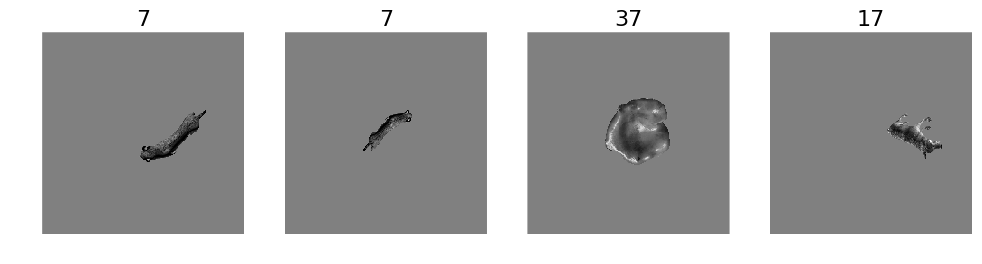

In [52]:
new_labels = [vgg.classes[x] for x in np.argmax(labels,1) ]
print(new_labels)
plots(imgs, titles=new_labels)